In [3]:
# - 분류 : input 데이터를 target의 범주형 데이터로 분류 
#       : 분류는 가장 가가운 이웃의 갯수가 많은 범주 쪽으로 결정 
#     target이 번주형 -> 분류 0과 1의 개념 

# - 회귀 : imput 데이터를 target의 연속형 (숫자or 날짜) 데이터로 분류 
#       : 분류는 가장 가까운 이웃의 숫자값들의 평균을 구하여
#         평균과 가장 근사한 값의 이웃 데이터가 예측값으로 결정됨
#     target이 연속형 -> 그룹핑? 어느 위치에 있냐는 개념 

In [4]:
# 02 _ 농어의 길이와 무게 데이터 (배열).txt 

In [7]:
## 농어의 길이 만으로 무계를 예측하기 
## - 길이는 : 훈련데이터 독립변수 (train_data)
## - 무게는 : 훈련데이터 종속변수 (train_target)

In [8]:
# 훈련 과정
# 1. 전처리 : 차원변경, 데이터 분리(train data, test data)
# 2. 훈련모델 생성 
# 3. 훈련 진행
# 4. 검증 
# 5. 예측 
# 6. 해석 

In [9]:
# 머신러닝 시 데이터는 2차원 
# target은 1차원 

In [10]:
import numpy as np

In [30]:
# 농어 길이
perch_length = np.array(
                [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
                 21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
                 22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
                 27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
                 36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
                 40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
                 )
# 농어 무게 
perch_weight = np.array(
                [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
                 110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
                 130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
                 197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
                 514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
                 820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
                 1000.0, 1000.0]
                 )

In [31]:
#  길이와 무게 데이터 차원 확인하기
# 행 하나만 가지고 있음 -> 1차원 데이터이다 
print (perch_length.shape , perch_weight.shape)

(56,) (56,)


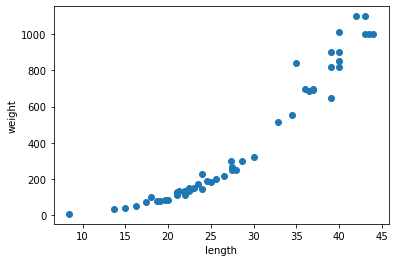

In [32]:
# 데이터 형태 확인하기 
# - 산점도 그리기 
# - 길이와 무게의 관계 확인하기 
import matplotlib.pyplot as plt

plt.scatter(perch_length, perch_weght)
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

# 데이터가 선형 관계(약간 라운드가 있는)를 가지고 있다
# (해석)
## - 길이가 길어질수록, 무게도 커지는 우상향 분포(정비례)를 나타내고 있으며, 
## - 실이와 무게는 선형관계를 보이고는 있으나, 약간의 곡선을 보이고 있음 
## - 우선은 선형으로 보고 분석 진행...

In [35]:
# 데이터 가져오기 -> 형태 확인 (분포 확인) -> test data, train data 분류 
# 훈련데이터셋과 테스트데이터셋으로 75:25로 분류하기 
## 변수는 어제와 동일 : train_input, train_target, test_input, test_target 
from sklearn.model_selection import train_test_split

train_input, test_input,train_target, test_target = \
train_test_split (perch_length, perch_weight, test_size = 0.25, random_state = 42)

# train_input = perch_length[:75]
# train_target = perch_weght[:75]

# test_input = perch_length[:25]
# test_target = perch_weght[:25]



In [36]:
print(train_input.shape, train_target.shape)
print (test_input.shape, test_target.shape)

(42,) (42,)
(14,) (14,)


In [39]:
# 데이터 전처리 하기 
# input 데이터에 대해서는 행렬의 2차원으로 만들어야 한다 
# -train_input : 42행 1열
# - test_input : 14행 1열
# reshape : 차원의 증가 

train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


In [45]:
## 차원변경 예시 

test_array= np.array([1,2,3,4])
print(test_array.shape, test_array)

# - 2행 2열로 만들어 보기 
test_array.reshape(2,2)
# 3행 3열은 만들 수 없다 -> 9개의 데이터가 필요하기 때문 

# 데이터의 개수가 4개 여서 4행 1열
# 전체 행을 의미 하느 것은 -1
# -1의 의미 = 전체 행을 의미, 전체 데이터의 개수 
test_array.reshape(-1,1)

(4,) [1 2 3 4]


array([[1],
       [2],
       [3],
       [4]])

In [46]:
# 훈련 시티기 
# 훈련 모델 라이브러리 불러들이기 
# 훈련 모델 생성 
# 훈련 시키기
# 훈련모델 검증하기 
# 예측하기 

In [47]:
# KNN : 회귀 알고리즘 사용 
# KNN 회귀 모델 라이브러리 
# KNeighborsClassifier : 분류 
# KNeighborsRegressor : 회귀 
from sklearn.neighbors import KNeighborsRegressor

In [53]:
#모델 생성하기 
# target 값을 찾으면 평균값을 낸다 -> 예측 
# n_neighbors = 이웃 값을 추측
# 결정값 
knr = KNeighborsRegressor()
# 훈련시키기
knr.fit(train_input,train_target)
# 검증하기 (결정계수) -> 0에서 1 사이의 값 
# 1에 가까울 수록 좋다 
knr.score(test_input,test_target)

# 분류 -> 정확도 : 잘 맞춘 것 
# 오차율 확인 필요 

0.992809406101064

In [56]:
# 실제 target 값과 예측값과의 오차가 어느정도 인지 확인하기
# mean_absolute_error : 오차 값을 확인 해주느 함수 
from sklearn.metrics import mean_absolute_error

# 예측하기 
test_prediction = knr.predict(test_input)
print(test_prediction)
print(test_target)

# target과 예측 값과의 평균 오차 확인하기 
# 차이에 대한 평균 값을 낸다 -> 19.157 : 평균 오차정도 
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

# (해석)
# -taregt 값의 특성은 무게이므로, 
# 실제 target과 예측 값과의 차이는 무게의 차이를 의미함
# 생성한 훈련모델을 이용했을 때 약 19g 정도 차이가 있음 
# 실제 데이터를 넣어서 확인 해봐양 한다 -> 과적합 여부 확인 필요 

[  60.    79.6  248.   122.   136.   847.   311.4  183.4  847.   113.
 1010.    60.   248.   248. ]
[   5.9  100.   250.   130.   130.   820.   320.   188.   900.   125.
 1000.    51.5  250.   300. ]
19.157142857142862


# 과적합 확인하기 

In [58]:
# 과대적합 : train score가 test score 보다 원등하게 높게 나오거나ㅡ 1인경우 
# -> 훈련데이터가 1이거나 너무 높은 경우 1이 나오면 무조건, 
# 차이의 기준은 없다 그러나 훈련데이터가 너무 높다 3이상 
# 데이터의 양을 늘리거나 하이퍼 파라미터를 조정 
# 0.1 대에서 차이가 난다 
# -> 튜닝 작업이 필요 

# 과소 적합 : train score 가 test score 보다 낮게 나오는 경우 
# -> train score 가 무조건 높게 나와야 한다 -> 모델 수정이 필요 ( 데이터 량이 적은 경우 많이 발생 )
# ** 일반적으로 trsin score는 test score 보다 약감 높게 아와야 한다 
# train data 와 test 데이터를 넣었을 때 차이를확인해야 한다 

# 쓸 수 있다 -> 0.9 정도 
# 0.95 정도 바람직


In [60]:
print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))
# (해석)
# train < test : 과소적합 발생 

# <과소적합> 발생원인 
## - 데이터 양이 적은 경우 주로 발생
## - 복잡도가 낮은 경우에도 발생한다
# 복잡도의 기준 : 하이퍼파라미터 값 
# -> 줄일 수 있는 최소 : 3 (* 짝수 개수로는 안된다) 

# <과소적합> 해소 방법 
## - 복잡도를 높게 하기 : 이웃의 개수를 줄이기 
## - 데이터 양을 늘이기

0.9698823289099254
0.992809406101064


In [65]:
# 과소적합 해소하기 
# 이웃의 개수 낮추기 : 복잡도 높아짐 
knr.n_neighbors = 3 
knr.fit(train_input, train_target)

print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

#(해석)
# 훈련데이터0.98 , 테스트데이터0.97 로 과소적합 해소 
# 최적의 n_neighbors = 3 

0.9804899950518966
0.9746459963987609


In [72]:
# test 데이터로 예측한 후 오차 확인해 주세요 
test_prediction = knr.predict(test_input)
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

#(해석)
# 예측값이 평균적으로 약 35g 정도 

35.42380952380951
